In [1]:
from QPIXL_qiskit.helper import *
from QPIXL_qiskit.qpixl_parallel import *
from qiskit.visualization import *
from qiskit_aer import StatevectorSimulator
import qiskit 
backend = StatevectorSimulator(method="statevector")

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('figures/creation_world.png')
img = img.convert('L')
img = np.array(img.resize((64,64), Image.Resampling.LANCZOS))
img2 = Image.open('figures/cat.webp')
img2 = img2.convert('L')
img2 = np.array(img2.resize((64,64), Image.Resampling.LANCZOS))
print(img2.shape,img.shape)

(64, 64) (64, 64)


In [32]:
shape = img.shape
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten(),np.flip(np.array(img2).T.flatten()),np.flip(np.array(img2)).flatten(),np.flip(np.array(img2)).T.flatten()] #sometimes you have to transpose the image for the decoding to make sense
decoded_data = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
job = backend.run(qc)
depth_str = " Circuit depth: "+str(qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
decoded = decodeParallelQPIXL(sv,qc,len(np_frame))
for datum in decoded:
    decoded_data.append(reconstruct_img(datum, shape))
labels.append(comp_str+depth_str)


12
[0, 1, 2, 3]
[0, 1, 2, 4]
[0, 1, 3, 4]
[0, 2, 3, 4]
[1, 2, 3, 4]


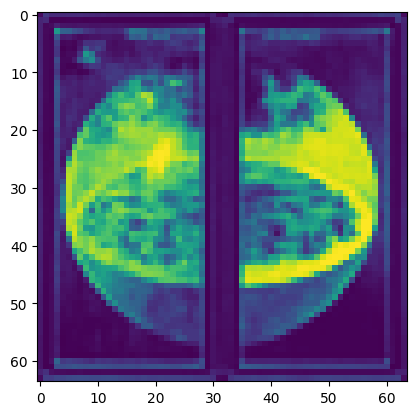

In [37]:
plt.imshow(decoded_data[0])

In [19]:
def permute_bits(b,bitlength=8,shift=1):
    b = bin(b)
    b = b[2:].zfill(bitlength)
    b = [b[(i + shift) % len(b)] for i in range(len(b))]
    return int(''.join(b),2)

In [20]:
dataset = 0
traced_over_qubits = [ qc.qubits.index(qubit) for qubit in [qc.qubits[other] for other in [0,1,2]] ]
print(traced_over_qubits)
density_matrix = qiskit.quantum_info.partial_trace(sv, traced_over_qubits)
probs = density_matrix.probabilities()
test = decodeQPIXL(probs)
ordered = [test[permute_bits(i,len(qc.qubits)-len(np_frame),dataset)] for i in range(len(test))]
plt.imshow(reconstruct_img(ordered, shape))

[0, 1, 2]


IndexError: list index out of range

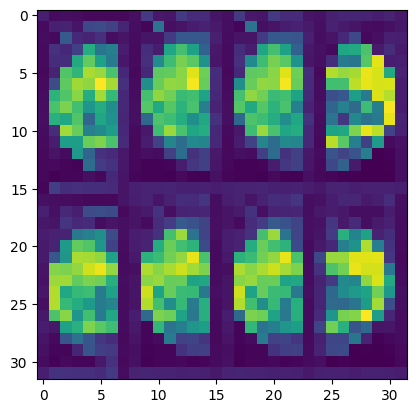

In [7]:
plt.imshow(decoded_data[1])